# imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from persiantools.digits import en_to_fa , fa_to_en
from persiantools import digits
from bidi.algorithm import get_display
import arabic_reshaper


font_path = os.path.join(os.getcwd(), "Vazirmatn-Regular.ttf")

# ساخت FontProperties
vazir_font = fm.FontProperties(fname=font_path)
def fas(text):
    """متن فارسی را اصلاح می‌کند (اتصال حروف + راست‌به‌چپ)"""
    return get_display(arabic_reshaper.reshape(text))

# --- تابع تنظیم خودکار فونت فارسی برای کل پروژه ---
def enable_farsi():
    plt.rcParams['font.family'] = vazir_font.get_name()
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ فونت فارسی فعال شد:", vazir_font.get_name())

%matplotlib inline
pd.set_option('display.max_columns', 200)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("digikala_products_117K.csv")
df.head(3)

,id,title_fa,brand,category,item_category2,item_category3,item_category4,item_category5,Date-sell,rating,rating_count,totally_satisfied_rate,totally_satisfied_rate_count,neutral_rate,neutral_rate_count,dissatisfied_rate,dissatisfied_rate_count,totally_dissatisfied_rate,totally_dissatisfied_rate_count,Cumulative_satisfaction_count,Cumulative_satisfaction_rate,selling_price,rrp_price,discount_percent,product_type,services_summary,seller_title,seller_rating_commitment,Number_of_comments,has_size_guide,specifications,dep_code
0,17839335,اسباب بازی زینتی کیمدی مدل آنخل دی ماریا 2025 ...,کیمدی,"[MA,اسباب بازی]",اسباب بازی، کودک و نوزاد,سرگرمی و آموزشی,اسباب بازی,شوخی و سرگرمی,7/13/2023,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590000,590000,0,product,NaN,گیف کده,99.8,0.0,False,"[{'title': 'مشخصات', 'attributes': [{'title': ...",دپارتمان 221063
1,17839336,ماگ پاد آفرین مدل روباه کد 159,پاد آفرین,"[HW,سرو و پذیرایی]",خانه و آشپزخانه,سرو و پذیرایی,پارچ، بطری و لیوان,ماگ,11/26/2021,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490000,1490000,0,product,NaN,وانیز,100.0,0.0,False,"[{'title': 'مشخصات', 'attributes': [{'title': ...",دپارتمان 407294
2,17839337,کیف کلاسوری گلوری قاب کد 01 مناسب برای گوشی مو...,متفرقه,"[AC,کیف و کاور موبایل و تبلت]",کالای دیجیتال,لوازم جانبی کالای دیجیتال,لوازم جانبی گوشی موبایل,کیف و کاور گوشی,10/28/2023,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2498000,2498000,0,product,NaN,لایت گارد,100.0,0.0,False,"[{'title': 'مشخصات', 'attributes': [{'title': ...",دپارتمان 677575


# tests

In [3]:
# df["rrp_price"] = df["rrp_price"].apply(lambda x: en_to_fa(str(x)))
df["rrp_price"] = df["rrp_price"].apply(lambda x: fa_to_en(str(x)))


In [4]:
print(df["item_category2"].unique())

['اسباب بازی، کودک و نوزاد' 'خانه و آشپزخانه' 'کالای دیجیتال'
 'محصولات بومی و محلی' 'مد و پوشاک' 'زیبایی و سلامت' 'خودرو و موتورسیکلت'
 'ابزار آلات و تجهیزات' 'کالاهای سوپرمارکتی' 'کتاب، لوازم تحریر و هنر'
 'ورزش و سفر' 'طلا و نقره' 'لوازم خانگی برقی' 'موبایل' 'کالای کارکرده']


In [5]:
# print(df["dimension9"].unique())
# df = df.drop(columns=["dimension9"])
# print(df["Unnamed: 10"].unique())
# df = df.drop(columns=["Unnamed: 10"])

#delete nan columns only
df.head(2)


,id,title_fa,brand,category,item_category2,item_category3,item_category4,item_category5,Date-sell,rating,rating_count,totally_satisfied_rate,totally_satisfied_rate_count,neutral_rate,neutral_rate_count,dissatisfied_rate,dissatisfied_rate_count,totally_dissatisfied_rate,totally_dissatisfied_rate_count,Cumulative_satisfaction_count,Cumulative_satisfaction_rate,selling_price,rrp_price,discount_percent,product_type,services_summary,seller_title,seller_rating_commitment,Number_of_comments,has_size_guide,specifications,dep_code
0,17839335,اسباب بازی زینتی کیمدی مدل آنخل دی ماریا 2025 ...,کیمدی,"[MA,اسباب بازی]",اسباب بازی، کودک و نوزاد,سرگرمی و آموزشی,اسباب بازی,شوخی و سرگرمی,7/13/2023,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590000,590000,0,product,NaN,گیف کده,99.8,0.0,False,"[{'title': 'مشخصات', 'attributes': [{'title': ...",دپارتمان 221063
1,17839336,ماگ پاد آفرین مدل روباه کد 159,پاد آفرین,"[HW,سرو و پذیرایی]",خانه و آشپزخانه,سرو و پذیرایی,پارچ، بطری و لیوان,ماگ,11/26/2021,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490000,1490000,0,product,NaN,وانیز,100.0,0.0,False,"[{'title': 'مشخصات', 'attributes': [{'title': ...",دپارتمان 407294


In [6]:
df["item_category2"].unique()

array(['اسباب بازی، کودک و نوزاد', 'خانه و آشپزخانه', 'کالای دیجیتال',
       'محصولات بومی و محلی', 'مد و پوشاک', 'زیبایی و سلامت',
       'خودرو و موتورسیکلت', 'ابزار آلات و تجهیزات', 'کالاهای سوپرمارکتی',
       'کتاب، لوازم تحریر و هنر', 'ورزش و سفر', 'طلا و نقره',
       'لوازم خانگی برقی', 'موبایل', 'کالای کارکرده'], dtype=object)

In [7]:
def category2_type_num(class_type):
    if "کالای دیجیتال" in class_type:
        return 1
    elif "خانه و آشپزخانه" in class_type or "خانه" in class_type:
       return 2
    elif "اسباب بازی، کودک و نوزاد" in class_type or "اسباب بازی" in class_type:
        return 3
    else:
        return 0

df["item_category2"] = df["item_category2"].apply(category2_type_num)
df["item_category2"]



0        3
1        2
2        1
3        2
4        0
        ..
20769    0
20770    0
20771    0
20772    1
20773    1
Name: item_category2, Length: 20774, dtype: int64

In [8]:
df_original = pd.read_csv("digikala_products_117K.csv")
df["item_category2"] = df_original["item_category2"]

In [9]:
df["rating"]= df["rating"].round(2)
df["rating"].unique()

array([  0.  , 100.  ,  20.  ,  40.  ,  90.  ,  60.  ,  80.  ,  96.  ,
        97.14,  70.  ,  73.33,  84.  ,  44.  ,  66.67,  56.  ,  45.  ,
        46.67,  93.33,  65.  ,  30.  ,  76.67,  77.78,  86.67,  95.  ,
        92.  ,  89.47,  88.  ,  77.6 ,  51.43,  88.57,  50.  ,  96.67,
        26.67,  87.5 ,  72.  ,  82.86,  78.06,  67.27,  56.67,  67.83,
        78.33,  91.59,  68.  ,  75.  ,  85.45,  83.33,  78.1 ,  83.53,
        76.  ])

In [10]:
# create new column
import random
df["dep_code"] = ["دپارتمان" +" "+ str(random.randint(100000, 999999)) for _ in range(len(df))]
# df["dep_code"]
df.to_csv("digikala_products_117K.csv", index=False)


In [11]:
df["dep_code"]= df["dep_code"].str.replace("دپارتمان" , "").astype(int)
df.dep_code

0        426702
1        848041
2        308715
3        459253
4        926433
          ...  
20769    997568
20770    953216
20771    154533
20772    542979
20773    696333
Name: dep_code, Length: 20774, dtype: int64

# persian Date

In [12]:
from persiantools.jdatetime import JalaliDate
import pandas as pd

df['Date-sell'] = pd.to_datetime(df['Date-sell'], errors='coerce')
def to_jalali(date_str):
    try:
        d = pd.to_datetime(date_str, errors="coerce")
        if pd.isna(d):
            return None
        j = JalaliDate.to_jalali(d.year, d.month, d.day)
        return f"{j.year}/{j.month}/{j.day}"
    except:
        return None

df["persian_date_sell"] = df["Date-sell"].apply(to_jalali)

print(df[["Date-sell", "persian_date_sell"]].head(10))

   Date-sell persian_date_sell
0 2023-07-13         1402/4/22
1 2021-11-26          1400/9/5
2 2023-10-28          1402/8/6
3 2022-04-05         1401/1/16
4 2021-07-27          1400/5/5
5 2022-09-28          1401/7/6
6 2023-01-07        1401/10/17
7 2021-07-01         1400/4/10
8 2021-04-17         1400/1/28
9 2022-04-29          1401/2/9


In [13]:
from persiantools import jdatetime
import jdatetime
# df["Date-sell"].dt.year.unique()

def extract_persian_year(x):
    try:
        if '/' in str(x):
            return int(str(x).split('/')[0])
        else:
            gdate = pd.to_datetime(x)
            return jdatetime.date.fromgregorian(date=gdate.date()).year
    except:
        return None

def extract_persian_month(x):
    try:
        if '/' in str(x):
            return int(str(x).split('/')[1])
        else:
            gdate = pd.to_datetime(x)
            return jdatetime.date.fromgregorian(date=gdate.date()).month
    except:
        return None

df['persian_year'] = df['persian_date_sell'].apply(extract_persian_year)
df['persian_month'] = df['persian_date_sell'].apply(extract_persian_month)
df['persian_year'].unique()
print(sorted(df["persian_month"].unique()))

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]


 # cleaning

In [14]:
df.info(memory_usage='deep')
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20774 entries, 0 to 20773
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               20774 non-null  int64         
 1   title_fa                         20774 non-null  object        
 2   brand                            20774 non-null  object        
 3   category                         20774 non-null  object        
 4   item_category2                   20774 non-null  object        
 5   item_category3                   20774 non-null  object        
 6   item_category4                   20618 non-null  object        
 7   item_category5                   18307 non-null  object        
 8   Date-sell                        20774 non-null  datetime64[ns]
 9   rating                           20774 non-null  float64       
 10  rating_count                     20774 non-null  int64    

id                                     0
title_fa                               0
brand                                  0
category                               0
item_category2                         0
item_category3                         0
item_category4                       156
item_category5                      2467
Date-sell                              0
rating                                 0
rating_count                           0
totally_satisfied_rate             20299
totally_satisfied_rate_count       20299
neutral_rate                       20299
neutral_rate_count                 20299
dissatisfied_rate                  20299
dissatisfied_rate_count            20299
totally_dissatisfied_rate          20299
totally_dissatisfied_rate_count    20299
Cumulative_satisfaction_count      20299
Cumulative_satisfaction_rate       20299
selling_price                          0
rrp_price                              0
discount_percent                       0
product_type    

In [15]:
int_cols = ['id', 'rating_count', 'dep_code', 'persian_year', 'persian_month']
for col in int_cols:
    df[col] = df[col].astype(np.int32)

float_cols = ['rating', 'seller_rating_commitment']
for col in float_cols:
    df[col] = df[col].astype(np.float32)

# چون مقدار زیاد دارن
obj_cols = ['brand', 'category', 'item_category2', 'product_type', 'seller_title']
for col in obj_cols:
    df[col] = df[col].astype('category')

df['Date-sell'] = pd.to_datetime(df['Date-sell'])

In [16]:
#deop columns
print('columns' , df.columns.tolist())
# df = df.drop(columns=["dissatisfied_rate_count" , "totally_dissatisfied_rate" , "totally_dissatisfied_rate_count" , "Cumulative_satisfaction_count" , "Cumulative_satisfaction_rate"])
# df = df.drop(columns=["totally_satisfied_rate" , "totally_satisfied_rate_count" , "neutral_rate" , "neutral_rate_count" , "services_summary","dissatisfied_rate"])
# df=df.drop(columns=["services_summary","dissatisfied_rate"])
# df=df.drop(columns=["item_category5"])
display(df.isnull().sum().sort_values(ascending=False))

columns ['id', 'title_fa', 'brand', 'category', 'item_category2', 'item_category3', 'item_category4', 'item_category5', 'Date-sell', 'rating', 'rating_count', 'totally_satisfied_rate', 'totally_satisfied_rate_count', 'neutral_rate', 'neutral_rate_count', 'dissatisfied_rate', 'dissatisfied_rate_count', 'totally_dissatisfied_rate', 'totally_dissatisfied_rate_count', 'Cumulative_satisfaction_count', 'Cumulative_satisfaction_rate', 'selling_price', 'rrp_price', 'discount_percent', 'product_type', 'services_summary', 'seller_title', 'seller_rating_commitment', 'Number_of_comments', 'has_size_guide', 'specifications', 'dep_code', 'persian_date_sell', 'persian_year', 'persian_month']


services_summary                   20774
totally_dissatisfied_rate_count    20299
dissatisfied_rate_count            20299
Cumulative_satisfaction_count      20299
Cumulative_satisfaction_rate       20299
totally_satisfied_rate             20299
totally_dissatisfied_rate          20299
neutral_rate_count                 20299
neutral_rate                       20299
totally_satisfied_rate_count       20299
dissatisfied_rate                  20299
item_category5                      2467
seller_rating_commitment             640
item_category4                       156
has_size_guide                       118
Number_of_comments                   118
specifications                       118
id                                     0
title_fa                               0
brand                                  0
Date-sell                              0
item_category3                         0
category                               0
rating                                 0
rating_count    

In [17]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20774 entries, 0 to 20773
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               20774 non-null  int32         
 1   title_fa                         20774 non-null  object        
 2   brand                            20774 non-null  category      
 3   category                         20774 non-null  category      
 4   item_category2                   20774 non-null  category      
 5   item_category3                   20774 non-null  object        
 6   item_category4                   20618 non-null  object        
 7   item_category5                   18307 non-null  object        
 8   Date-sell                        20774 non-null  datetime64[ns]
 9   rating                           20774 non-null  float32       
 10  rating_count                     20774 non-null  int32    

In [18]:
#regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age','Salary']] = scaler.fit_transform(df[['Age','Salary']])

KeyError: "None of [Index(['Age', 'Salary'], dtype='object')] are in the [columns]"

In [15]:
def to_numeric(x):
    try:
        if pd.isna(x): return np.nan
        x = str(x).replace(',', '').replace(' ', '')
        return float(x)
    except:
        return np.nan

df['selling_price'] = df['selling_price'].apply(to_numeric)
df['rrp_price'] = df['rrp_price'].apply(to_numeric)
df['discount_percent'] = pd.to_numeric(df['discount_percent'], errors='coerce')

# rating, rating_count to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


In [16]:
display(df[['selling_price','rrp_price','discount_percent','rating','rating_count']].describe().T)


,count,mean,std,min,25%,50%,75%,max
selling_price,20774.0,1.648021e+07,8.478752e+07,19000.0,1490000.0,2834050.0,8100000.0,4.928442e+09
rrp_price,20774.0,1.794886e+07,8.847462e+07,19000.0,1580000.0,2990000.0,8900000.0,5.299400e+09
discount_percent,20774.0,7.446375e+00,1.266610e+01,0.0,0.0,0.0,12.0,8.900000e+01
rating,20774.0,2.636635e+00,1.511344e+01,0.0,0.0,0.0,0.0,1.000000e+02
rating_count,20774.0,6.898046e-02,8.343857e-01,0.0,0.0,0.0,0.0,6.900000e+01


In [24]:
# MISSINGNESS STRATEGIES
# بررسی درصد missing هر ستون
miss_pct = df.isnull().mean().sort_values(ascending=False).round(2)
display(miss_pct)

for col in ['rating','rating_count','discount_percent']:
    df[f'{col}_is_na'] = df[col].isna().astype(int)


services_summary                   1.00
totally_dissatisfied_rate          0.98
dissatisfied_rate_count            0.98
neutral_rate                       0.98
totally_satisfied_rate_count       0.98
neutral_rate_count                 0.98
totally_dissatisfied_rate_count    0.98
Cumulative_satisfaction_count      0.98
Cumulative_satisfaction_rate       0.98
dissatisfied_rate                  0.98
totally_satisfied_rate             0.98
item_category5                     0.12
seller_rating_commitment           0.03
item_category4                     0.01
Number_of_comments                 0.01
has_size_guide                     0.01
specifications                     0.01
item_category3                     0.00
item_category2                     0.00
id                                 0.00
title_fa                           0.00
category                           0.00
brand                              0.00
rrp_price                          0.00
selling_price                      0.00


# Analysis

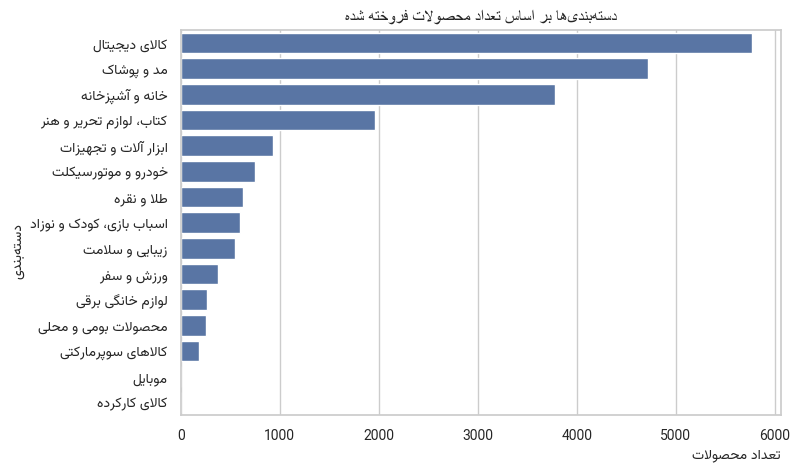

In [18]:
top_cats = df['item_category2'].value_counts().head(20)
top_brands = df['brand'].value_counts().head(20)

plt.figure(figsize=(10,5))

cats_labels = [fas(label) for label in top_cats.index]

sns.barplot(y=cats_labels, x=top_cats.values)

plt.title(fas('دسته‌بندی‌ها بر اساس تعداد محصولات فروخته شده'))
plt.xlabel(fas('تعداد محصولات'), fontproperties=vazir_font, ha='right', x=1)
plt.ylabel(fas('دسته‌بندی'), fontproperties=vazir_font, ha='right')
plt.xticks(fontproperties=vazir_font)
plt.yticks(fontproperties=vazir_font, ha='right')

plt.subplots_adjust(left=0.3)
plt.show()

,discount_percent,selling_price,rating,rating_count
discount_percent,1.000000,0.068289,0.066399,0.066662
selling_price,0.068289,1.000000,-0.004498,-0.003776
rating,0.066399,-0.004498,1.000000,0.999693
rating_count,0.066662,-0.003776,0.999693,1.000000


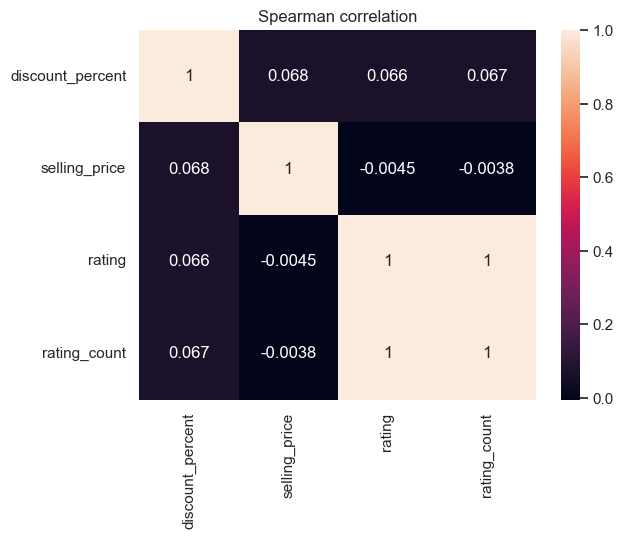

In [20]:
corr_price_rating = df[['discount_percent','selling_price','rating','rating_count']].corr(method='spearman')
display(corr_price_rating)
sns.heatmap(corr_price_rating, annot=True )
plt.title('Spearman correlation')
plt.show()

In [31]:
# برای اینکه ببینیم ارزانتر یا گرانتر بودن بین دسته ها اتفاقی یا معنا دار
counts = df['item_category2'].value_counts()

df.groupby('item_category2' , observed=True)['selling_price'].count()
df.groupby('item_category2',observed=True)['selling_price'].var()

# print(df['item_category2'].value_counts())
cats = df['item_category2'].value_counts().nlargest(6).index.tolist()
sample = df[df['item_category2'].isin(cats)]

valid_groups = []
valid_names = []
for name, group in sample.groupby('item_category2' , observed=True):
    prices = group['selling_price'].dropna().values
    if len(prices) >= 3 and prices.var() > 0:
        valid_groups.append(prices)
        valid_names.append(name)

if len(valid_groups) >= 2:
    fstat, pval = stats.f_oneway(*valid_groups)
    print("Valid categories:", valid_names)
    print("ANOVA F-stat:", fstat, "p-value:", pval)
else:
    print("گروه‌های کافی برای ANOVA موجود نیستند.")

['کالای دیجیتال', 'مد و پوشاک', 'خانه و آشپزخانه', 'کتاب، لوازم تحریر و هنر', 'ابزار آلات و تجهیزات', 'خودرو و موتورسیکلت']
Valid categories: ['ابزار آلات و تجهیزات', 'خانه و آشپزخانه', 'خودرو و موتورسیکلت', 'مد و پوشاک', 'کالای دیجیتال', 'کتاب، لوازم تحریر و هنر']
ANOVA F-stat: 19.543705219368903 p-value: 1.8111296859896457e-19


C:\Users\Shop1401\AppData\Local\Temp\ipykernel_18548\3088545899.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_stats = df.groupby('item_category2')['selling_price'].agg(['mean', 'count']).reset_index()
C:\Users\Shop1401\AppData\Local\Temp\ipykernel_18548\3088545899.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


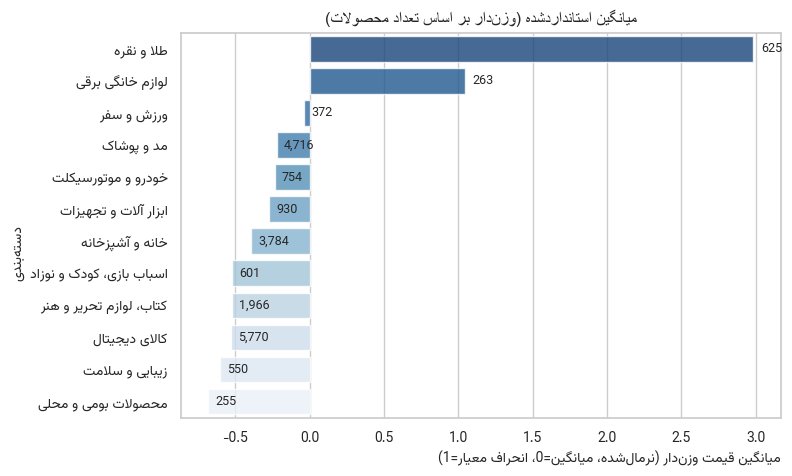

In [34]:
#«طلا و نقره» با اختلاف زیاد در صدره — مقدار استانداردشده حدود ۳ واحد انحراف معیار بالاتر از میانگینه.
# «ورزش و سفر»، «مد و پوشاک» و «موبایل».  قیمت محصولات این گروه‌ها تقریباً نزدیک به میانگین کلی بازار هست. یعنی این‌ها بازارهای «میان‌رده» هستن؛ نه لوکس، نه خیلی ارزان.
#شامل «زیبایی و سلامت»، «کالای دیجیتال»، «اسباب‌بازی و کودک»، «سوپرمارکتی» و ...
 # این‌ها قیمت میانگین پایین‌تری دارن و از دید خریدار، جزو کالاهای نسبتاً ارزان‌تر محسوب می‌شن.
 # مثلاً «کالای دیجیتال» با وجود تعداد زیاد (۵۷۷۰ محصول) نشون می‌ده قیمت‌ها در این دسته پراکندگی زیادی دارن و بیشتر اقلام احتمالاً در محدوده پایین‌تر قرار گرفتن (مثلاً کابل، ماوس، پاوربانک، و غیره).
cat_stats = df.groupby('item_category2')['selling_price'].agg(['mean', 'count']).reset_index()
cat_stats = cat_stats[cat_stats['count'] > 200]
cat_stats.columns = ['category', 'mean_price', 'count']

cat_stats['weighted_mean'] = cat_stats['mean_price'] * np.log1p(cat_stats['count'])
scaler = StandardScaler()
cat_stats['weighted_scaled'] = scaler.fit_transform(cat_stats[['weighted_mean']])

top_cats_scaled = cat_stats.sort_values(by='weighted_scaled', ascending=False).head(20)

plt.figure(figsize=(10,5))
cats_labels = [fas(label) for label in top_cats_scaled['category']]

sns.barplot(
    y=cats_labels,
    x=top_cats_scaled['weighted_scaled'],
    palette="Blues_r",
    alpha=0.8
)

for i, (val, cnt) in enumerate(zip(top_cats_scaled['weighted_scaled'], top_cats_scaled['count'])):
    plt.text(val + 0.05, i, f"{cnt:,}", va='center', fontproperties=vazir_font, fontsize=9)

plt.title(fas('میانگین استانداردشده (وزن‌دار بر اساس تعداد محصولات)'))
plt.xlabel(fas('میانگین قیمت وزن‌دار (نرمال‌شده، میانگین=0، انحراف معیار=1)'), fontproperties=vazir_font, ha='right', x=1)
plt.ylabel(fas('دسته‌بندی'), fontproperties=vazir_font, ha='right')
plt.xticks(fontproperties=vazir_font)
plt.yticks(fontproperties=vazir_font, ha='right')
plt.subplots_adjust(left=0.3)
plt.show()

ضریب همبستگی بین تخفیف و امتیاز: 0.107


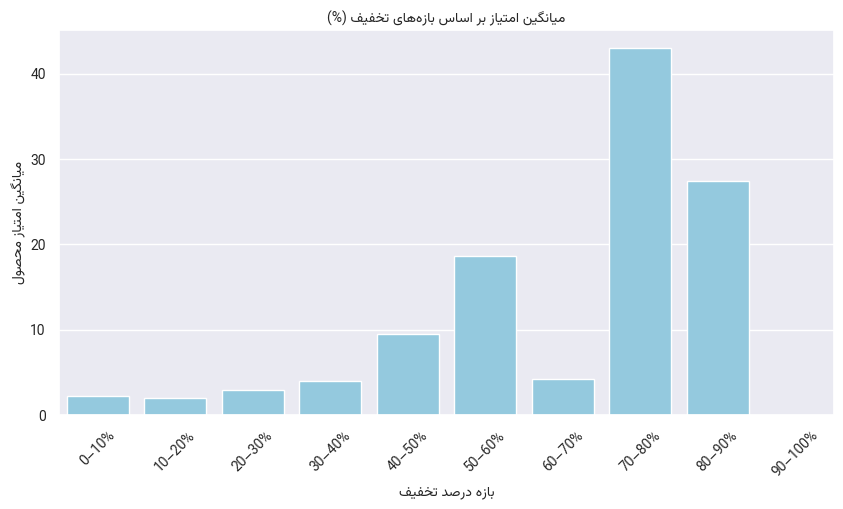

In [22]:
corr = df['discount_percent'].corr(df["rating"])
print("ضریب همبستگی بین تخفیف و امتیاز:", round(corr, 3))

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels =['0–10%', '10–20%', '20–30%', '30–40%', '40–50%', '50–60%', '60–70%', '70–80%', '80–90%', '90–100%']

df["discount_bin"] = pd.cut(df["discount_percent"], bins, labels=labels , include_lowest=True)
rating_by_discount = df.groupby("discount_bin" , observed=True)['rating'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=rating_by_discount , x='discount_bin', y='rating' , color='skyblue')

plt.title(fas('میانگین امتیاز بر اساس بازه‌های تخفیف (%)'), fontproperties=vazir_font)
plt.xlabel(fas('بازه درصد تخفیف'), fontproperties=vazir_font)
plt.ylabel(fas('میانگین امتیاز محصول'), fontproperties=vazir_font)
plt.xticks(rotation=45, fontproperties=vazir_font)
plt.yticks(fontproperties=vazir_font)
plt.show()

    persian_year  persian_month  count
0           1402              1    384
1           1402              2    337
2           1402              3    319
3           1402              4    377
4           1402              5    372
5           1402              6    341
6           1402              7    323
7           1402              8    378
8           1402              9    361
9           1402             10    364
10          1402             11    351
11          1402             12    350
12          1403              1    337
13          1403              2    346
14          1403              3    365
15          1403              4    388
16          1403              5    384
17          1403              6    366
18          1403              7    371
19          1403              8    363
20          1403              9    339
21          1403             10    331
22          1403             11    268


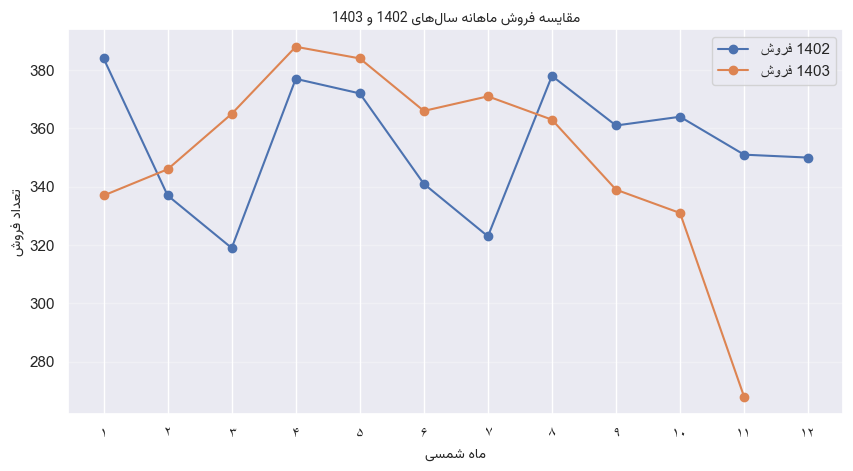

In [65]:
df["persian_year"].unique()
# print(sorted(df["persian_month"].unique()))

years_to_compare = [1402, 1403]
df_filtered  = df[df["persian_year"].isin(years_to_compare)]
monthly_sale = df_filtered.groupby(["persian_year", "persian_month"]).size().reset_index(name="count")
print(monthly_sale)

plt.figure(figsize=(10,5))

for year in years_to_compare:
    data_year = monthly_sale[monthly_sale["persian_year"] == year]
    plt.plot(
        data_year['persian_month'],
        data_year['count'],
        marker='o',
       label=f'{fas("فروش")} {fas(str(year))}'

    )
plt.xticks(
    ticks=range(1,13),
    labels=[digits.en_to_fa(str(i)) for i in range(1,13)]
)

plt.title(fas('مقایسه فروش ماهانه سال‌های 1402 و 1403'), fontproperties=vazir_font)
plt.xlabel(fas('ماه شمسی'), fontproperties=vazir_font)
plt.ylabel(fas('تعداد فروش'), fontproperties=vazir_font)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

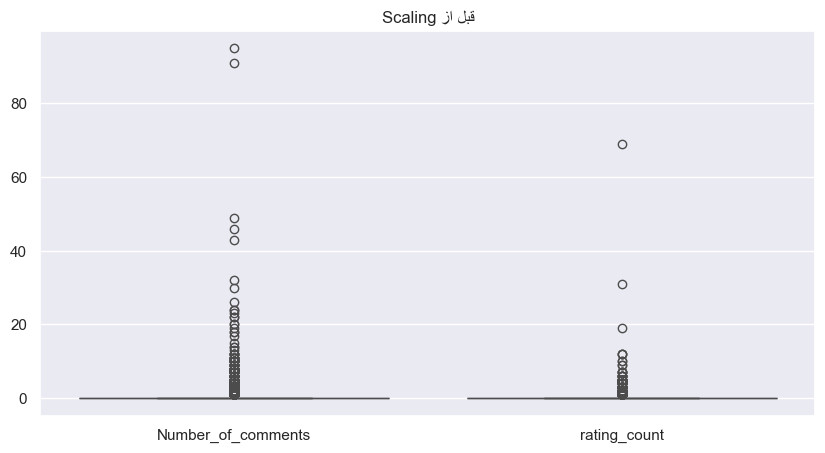

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Number_of_comments', 'rating_count']])
plt.title(fas('قبل از Scaling'))
plt.show()

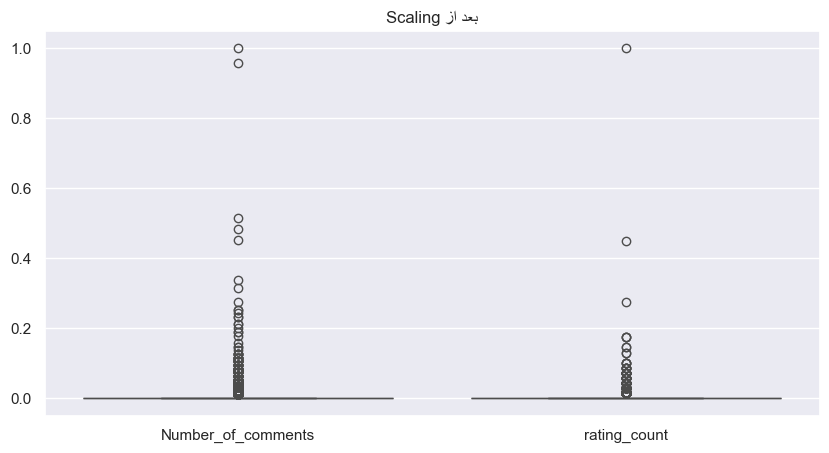

In [92]:
scaler = MinMaxScaler()
scaled_cols = ['Number_of_comments', 'rating_count']

df_scaled = df.copy()
df_scaled[scaled_cols] = scaler.fit_transform(df_scaled[scaled_cols])

plt.figure(figsize=(10,5))
sns.boxplot(data=df_scaled[scaled_cols])
plt.title(fas('بعد از Scaling'))
plt.show()

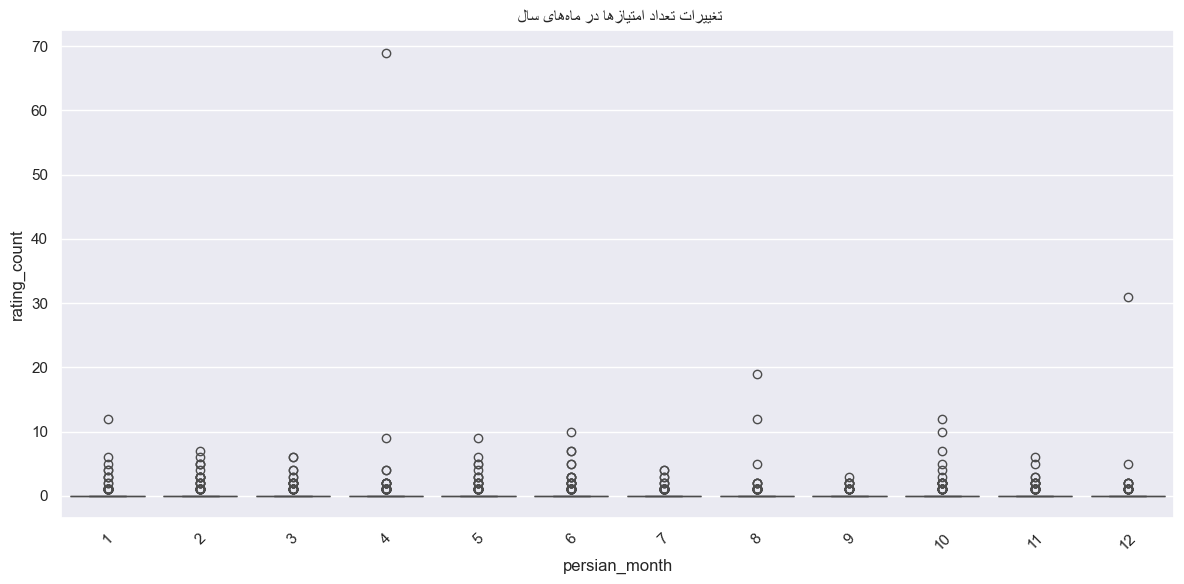

In [77]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df,
    x='persian_month',
    y='rating_count'
)

plt.xticks(rotation=45)
plt.title(fas('تغییرات تعداد امتیازها در ماه‌های سال '))
plt.tight_layout()
plt.show()


C:\Users\Shop1401\AppData\Local\Temp\ipykernel_10400\2236598761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_count = df.groupby("brand").size().reset_index(name="num_sales")


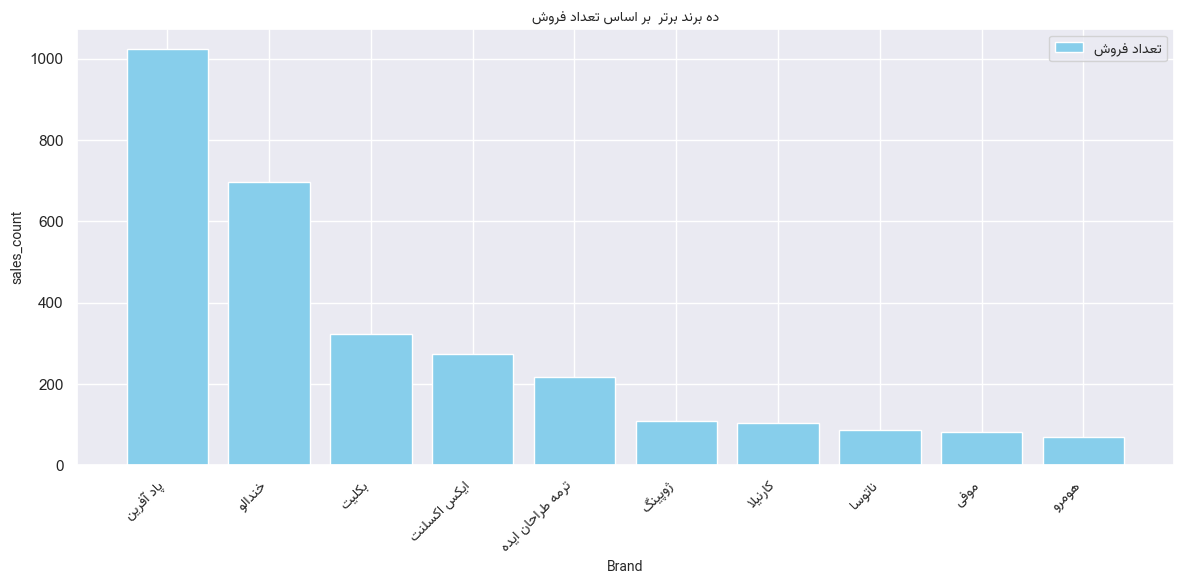

In [112]:
brand_count = df.groupby("brand").size().reset_index(name="num_sales")
top_brands = brand_count.sort_values(by="num_sales", ascending=False).iloc[1:11]  # از ایندکس 1 تا 10

plt.figure(figsize=(12,6))
plt.bar(
top_brands["brand"],
top_brands["num_sales"],
color='skyblue',
label=fas("تعداد فروش")
)
plt.xticks(
range(len(top_brands["brand"])),
[fas(b) for b in top_brands["brand"]],
rotation=45, ha='right',
fontproperties=vazir_font
)
plt.xlabel("Brand", fontproperties=vazir_font)
plt.ylabel("sales_count", fontproperties=vazir_font)
plt.title(fas("ده برند برتر  بر اساس تعداد فروش"), fontproperties=vazir_font)
plt.legend(prop=vazir_font)
plt.tight_layout()
plt.show()

Pearson correlation: r=-0.472, p-value=0.169


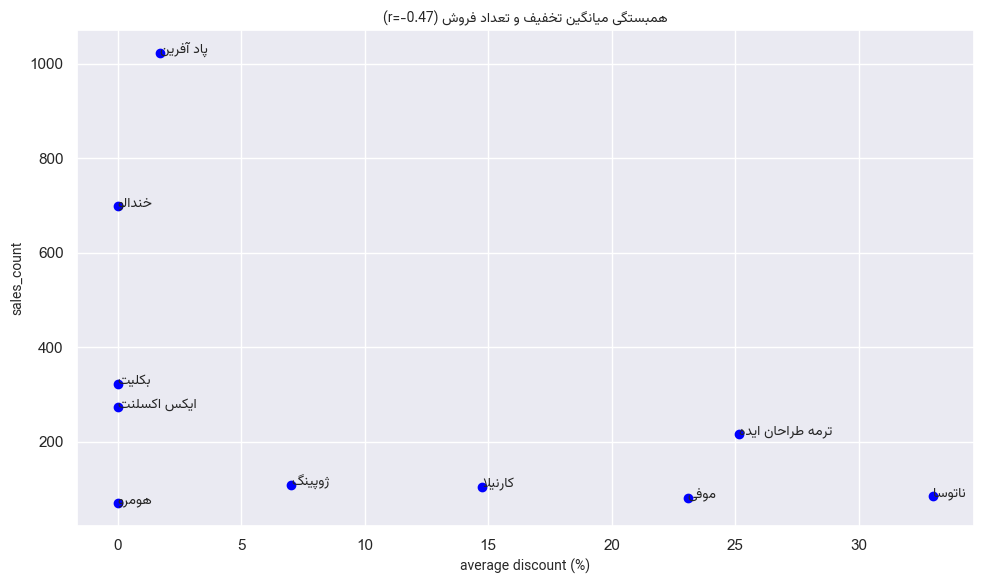

In [117]:
from scipy.stats import pearsonr


top_brands_list = top_brands["brand"].tolist()
discount_summary = df[df["brand"].isin(top_brands_list)].groupby("brand", observed=False)["discount_percent"].mean().reset_index()
discount_summary = discount_summary.merge(top_brands[["brand", "num_sales"]], on="brand")

r, p = pearsonr(discount_summary["discount_percent"], discount_summary["num_sales"])
print(f"Pearson correlation: r={r:.3f}, p-value={p:.3f}")

plt.figure(figsize=(10,6))
plt.scatter(discount_summary["discount_percent"], discount_summary["num_sales"], color='blue')
for i, row in discount_summary.iterrows():
    plt.text(row["discount_percent"], row["num_sales"], fas(row["brand"]), fontproperties=vazir_font)

plt.xlabel("average discount (%)", fontproperties=vazir_font)
plt.ylabel("sales_count", fontproperties=vazir_font)
plt.title(fas(f"همبستگی میانگین تخفیف و تعداد فروش (r={r:.2f})"), fontproperties=vazir_font)
plt.tight_layout()
plt.show()

# بر اساس اینکه p-value>0.05 یعمی تصائفی بوده و به این معنی نیست که تخفیف بالاتر بوده تعداد فروش هم ببیشتر شده

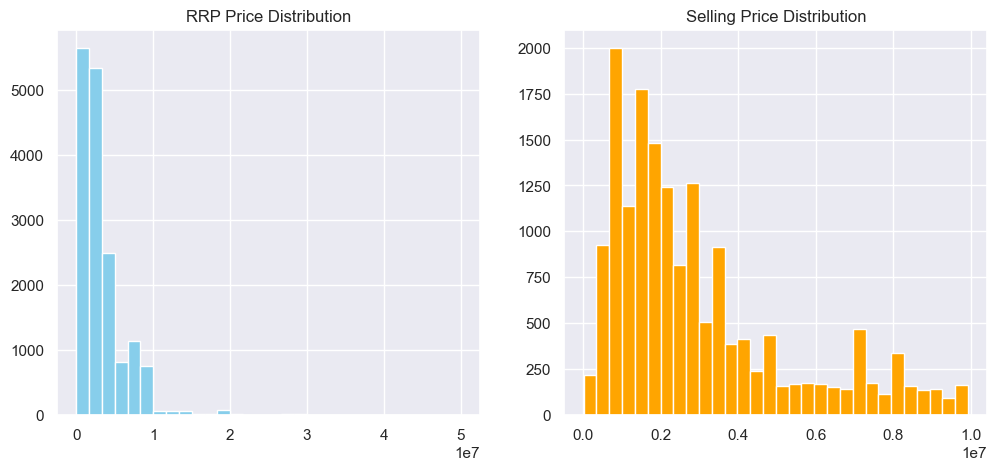

Pearson correlation: r=0.899, p-value=0.000


In [119]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['rrp_price'], bins=30, color='skyblue')
plt.title('RRP Price Distribution')
plt.subplot(1,2,2)
plt.hist(df['selling_price'], bins=30, color='orange')
plt.title('Selling Price Distribution')
plt.show()

from scipy.stats import pearsonr

r, p = pearsonr(df['rrp_price'], df['selling_price'])
print(f'Pearson correlation: r={r:.3f}, p-value={p:.3f}')

#همبستگی چون  p-value = 0 کاملا معناداره

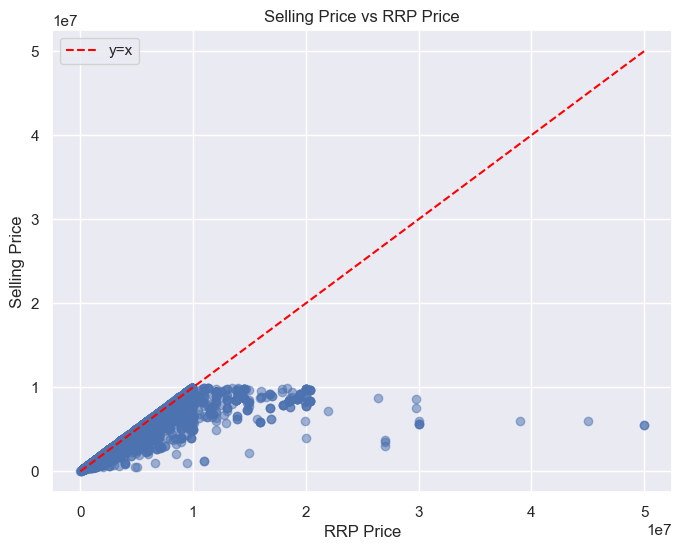

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(df['rrp_price'], df['selling_price'], alpha=0.5)
plt.plot([df['rrp_price'].min(), df['rrp_price'].max()],
         [df['rrp_price'].min(), df['rrp_price'].max()],
         color='red', linestyle='--', label='y=x')
plt.xlabel('RRP Price')
plt.ylabel('Selling Price')
plt.title('Selling Price vs RRP Price')
plt.legend()
plt.show()

#اگر نقاط بالای خط قرمز باشند → فروش بالاتر از RRP است که غیرمنطقی است.
# نقاط خیلی پایین → ممکن است تخفیف غیرمعمول یا داده اشتباه باشد.